# Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set()

In [2]:
df=pd.read_csv("diabetes1.csv")

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### It seems in the minumum there are values of zero which we need to deal with later

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### It seems that all features are continuous numbers/integers (no categorical)

In [7]:
df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

#### We rename the Diabetes Pedigree Function feature to DPF in order to shorten it for easier use

In [8]:
df.drop_duplicates().shape

(768, 9)

#### It seems that there are no duplicates as number of observations of the data did not change

# Statistical Distribution

In [9]:
counts = df['Outcome'].value_counts()
counts

0    500
1    268
Name: Outcome, dtype: int64

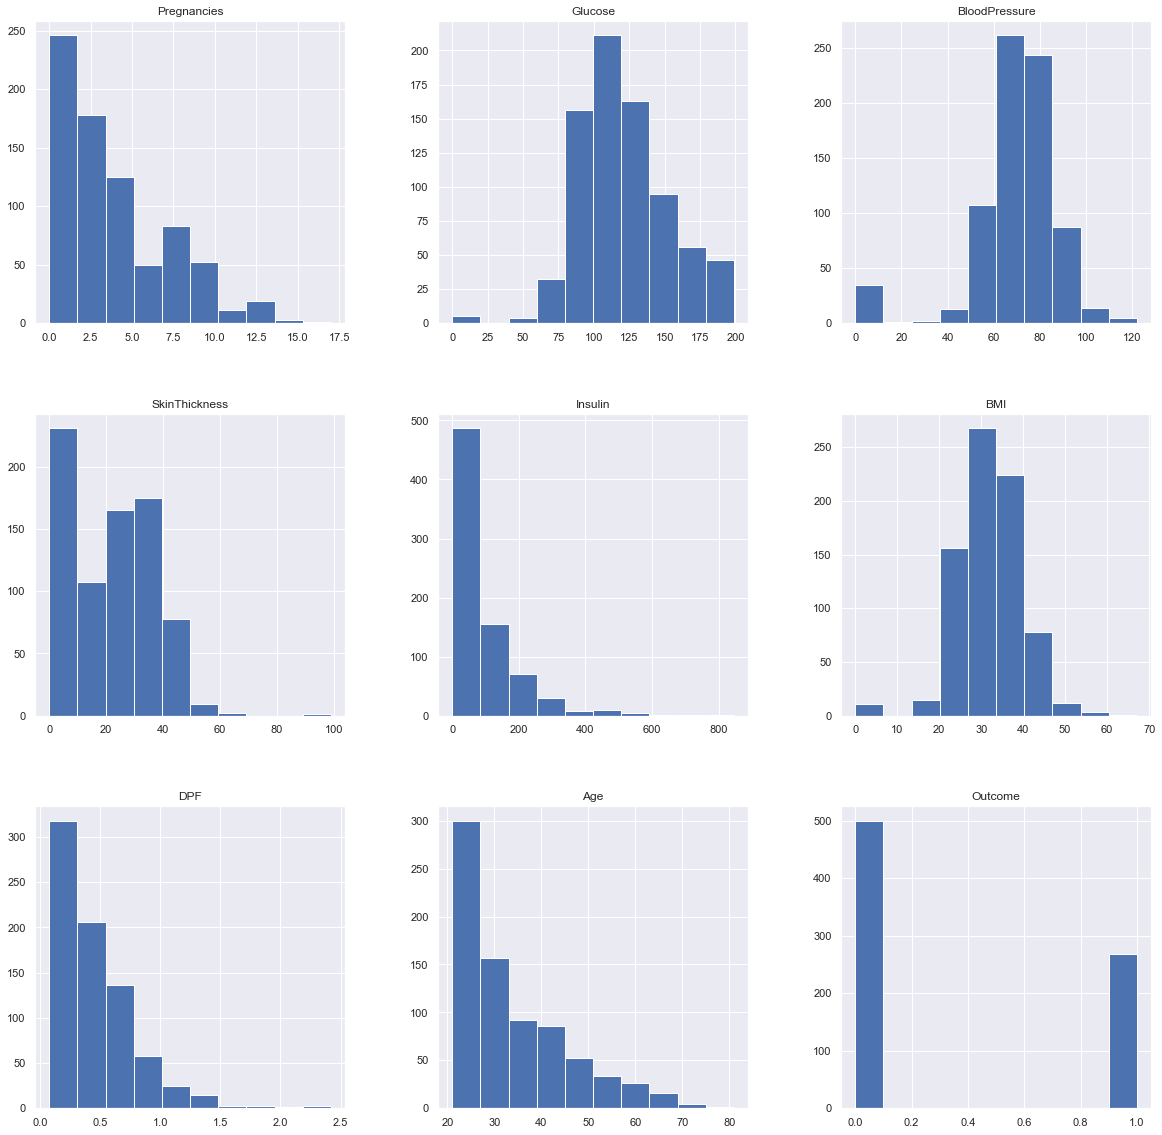

In [10]:
hist = df.hist(figsize = (20,20))

#### Glucose, Blood Pressure and BMI graphs are almost symmetric
#### Pregnancies, SkinThickness, Insulin, Age, and DPF are positively skewed

## Box Plots for Numerical Variables

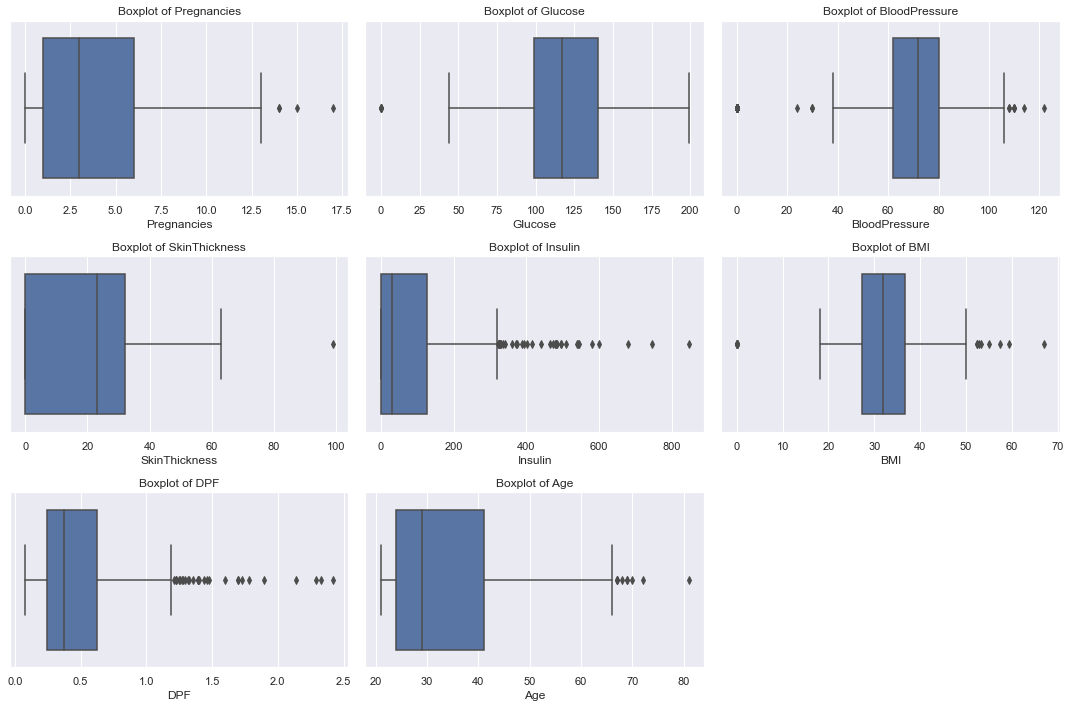

In [11]:
numerical_columns = df.columns[:-1]
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#### As shown from the Boxplots there are some outliers in each variable as any points below the minimum or above the maximum are considered outliers

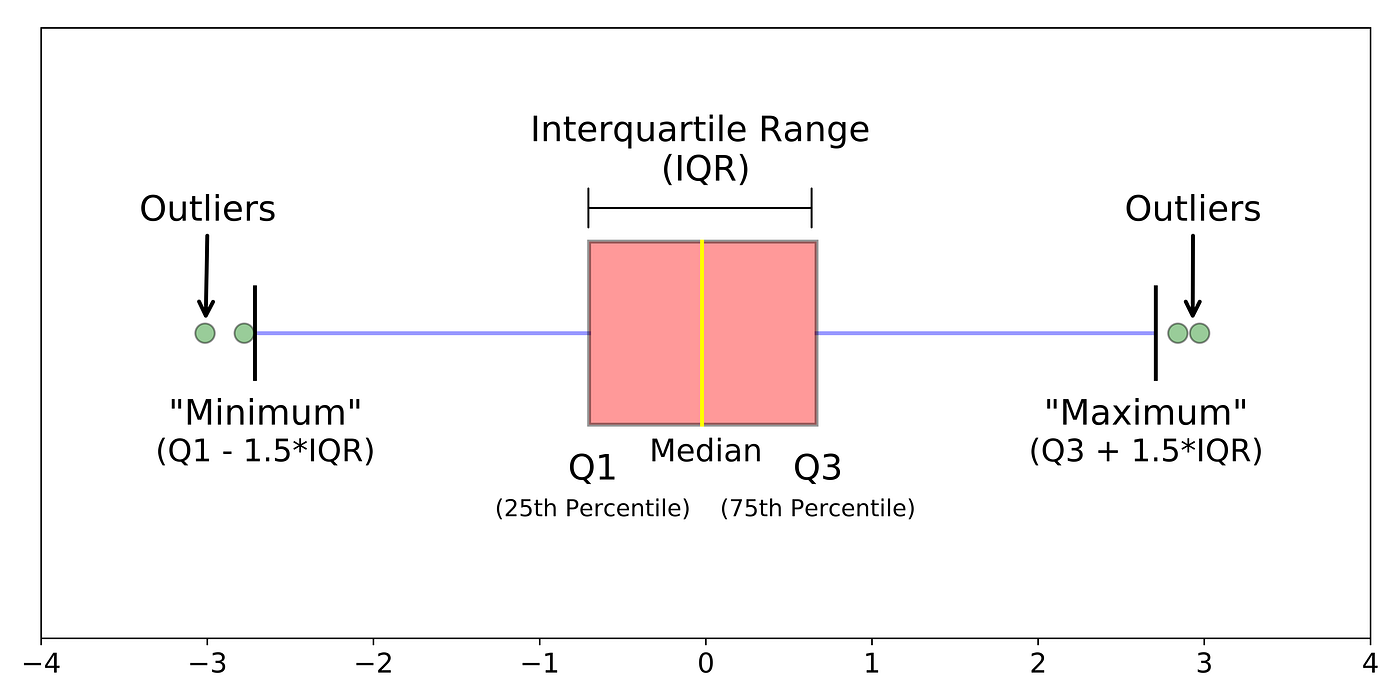

## Boxplot by Outcome Variable

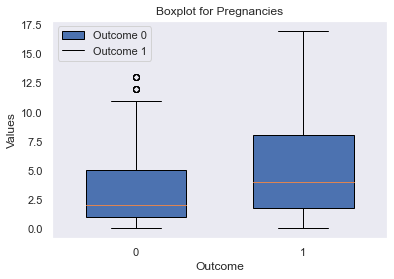

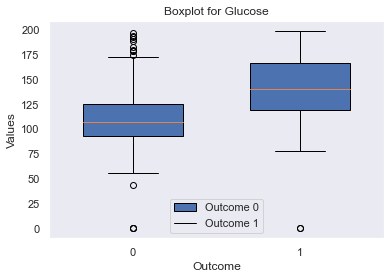

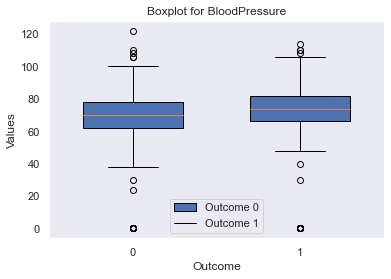

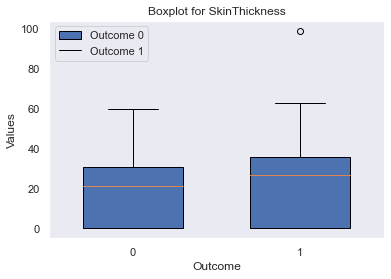

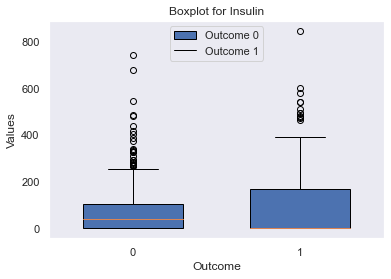

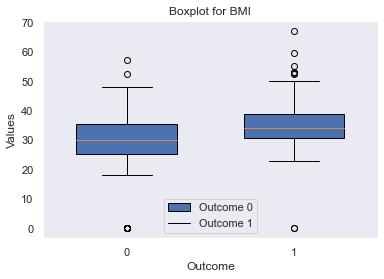

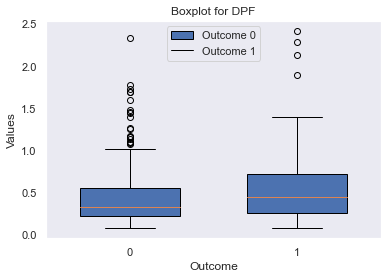

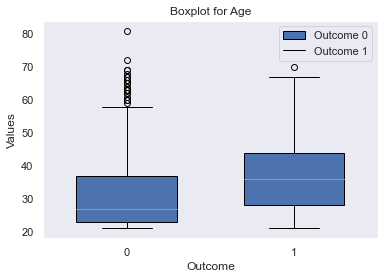

In [12]:
# Grouping DataFrame by outcome variable
groups = df.groupby('Outcome')

# Plotting boxplots for each variable
for variable in df.columns[:-1]:  # Exclude the outcome variable
    plt.figure(figsize=(6, 4))
    for outcome, group in groups:
        plt.boxplot(group[variable], positions=[outcome], widths=0.6, patch_artist=True)
    plt.title(f'Boxplot for {variable}')
    plt.xlabel('Outcome')
    plt.ylabel('Values')
    plt.xticks([0, 1], ['0', '1'])
    plt.grid(False)
    plt.legend(['Outcome 0', 'Outcome 1'])
    plt.show()

#### As shown from the Boxplots grouped by outcome, there are some outliers for both classes in each variable, but we can see that class with label zero has more outliers and this could be due to that this class has more observations than the other class. 

# Checking Class Imbalance for the Target Class "Outcome"

In [13]:
import plotly.graph_objects as go
colors = ['skyblue', 'orange']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

#### As shown from the outcome variable distriution there is no major class imbalance as the class with label 0 has 500 observations which represents 65.1% from the data and the class with label 1 has 268 observations which represents 34.9% from the data.

# Missing Values

<AxesSubplot:>

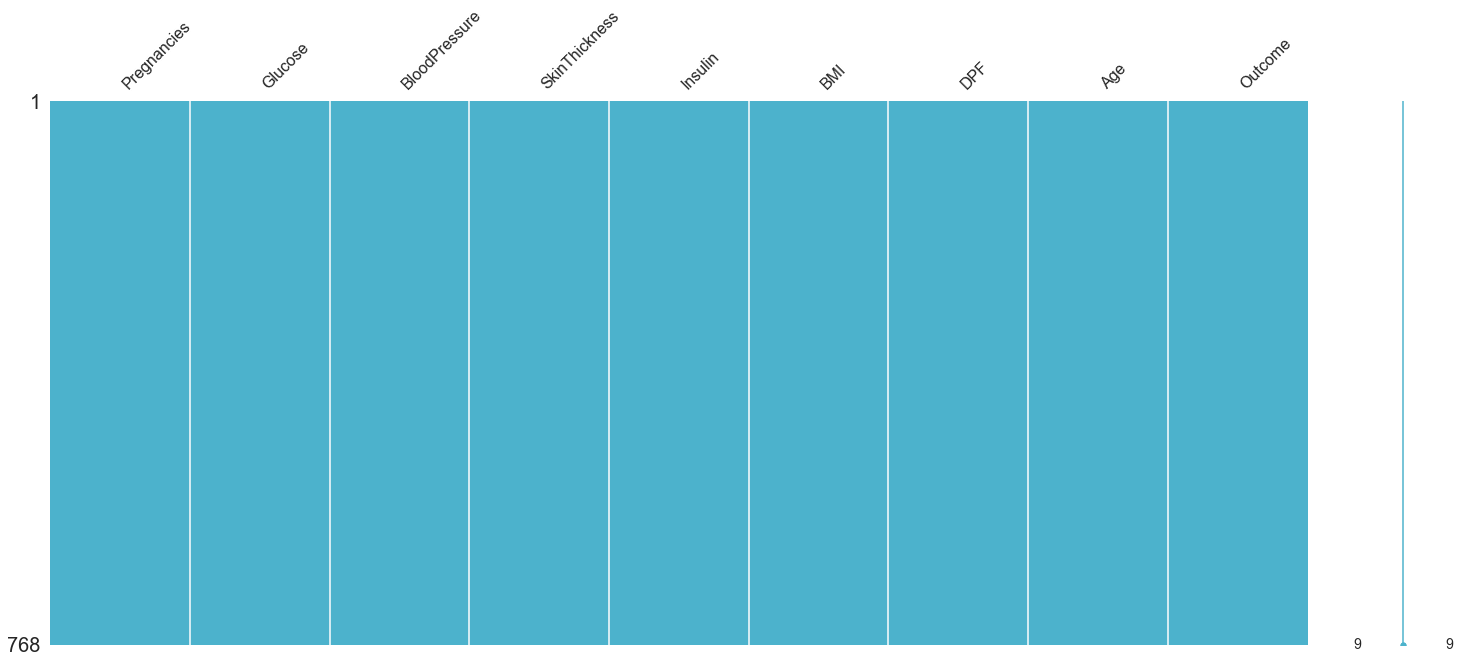

In [14]:
import missingno as msno
msno.matrix(df, color=(0.3, 0.7, 0.8))

In [15]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

#### There are no missing values.

# Correlation with Target Feature "Outcome"

Text(0.5, 1.0, 'Correlation Plot')

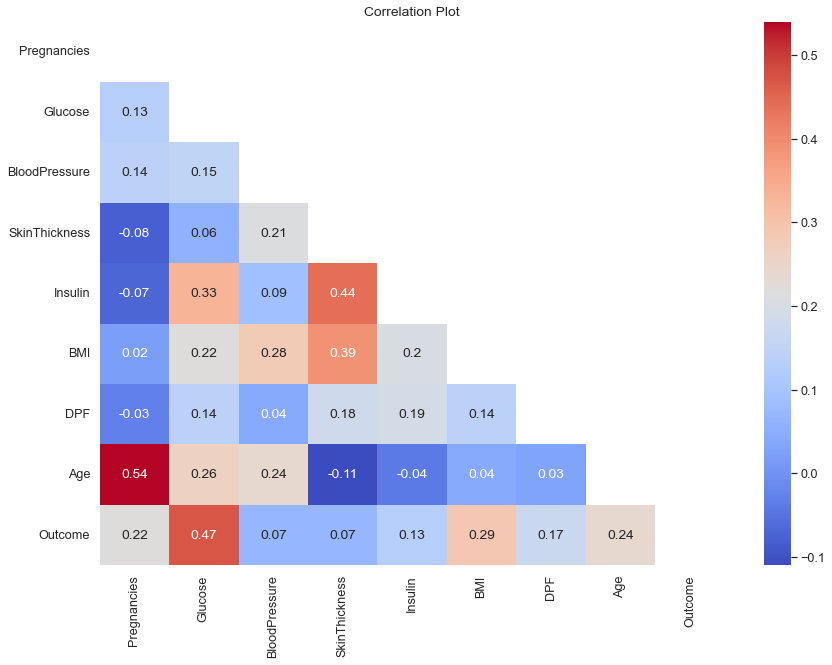

In [16]:
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=mask,cbar=True)
plt.title('Correlation Plot')

<Figure size 720x576 with 0 Axes>

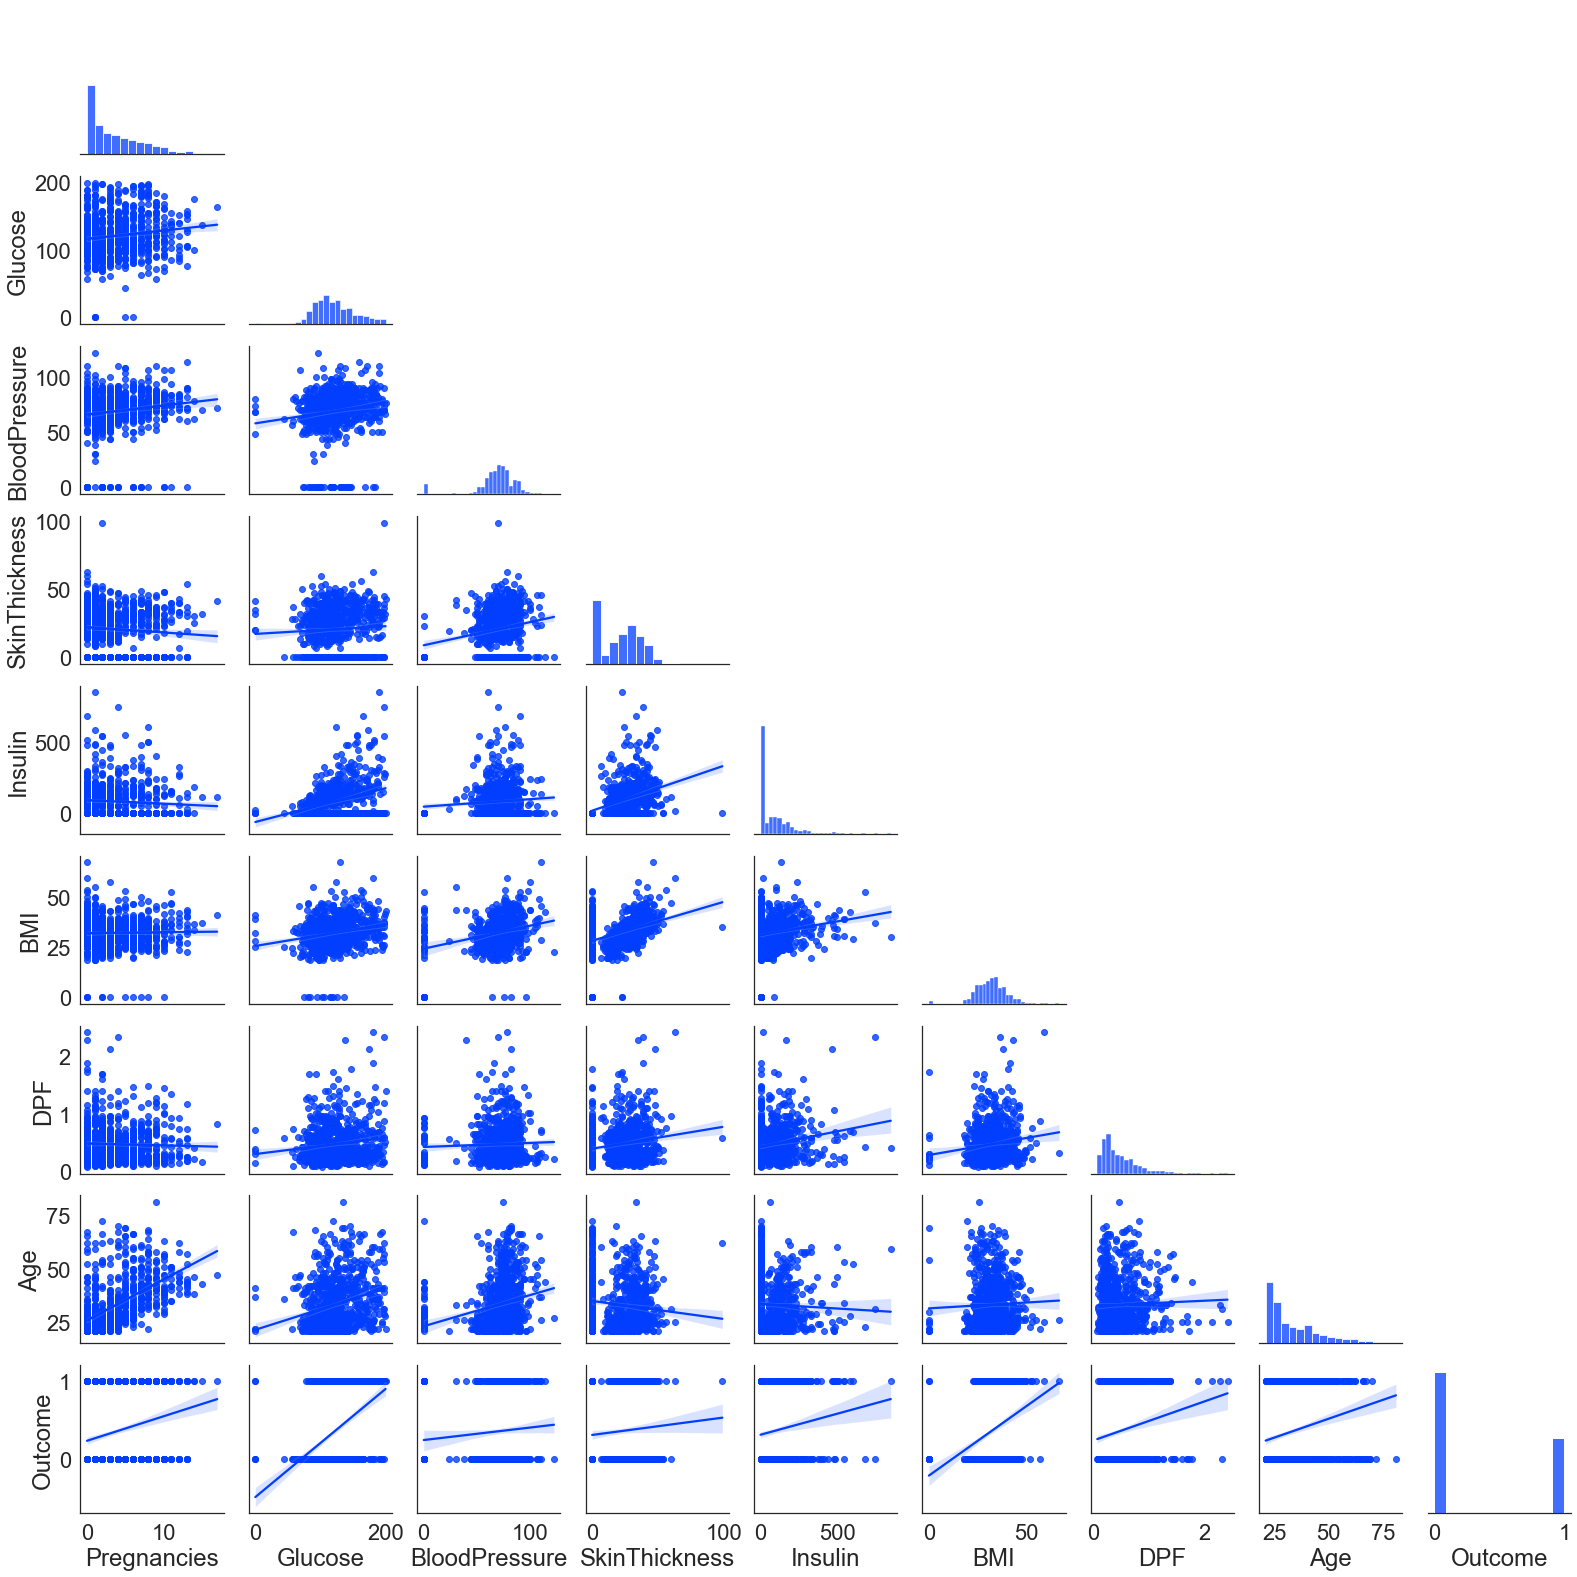

In [17]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(df,kind = 'reg',corner = True,palette ='YlGnBu' )

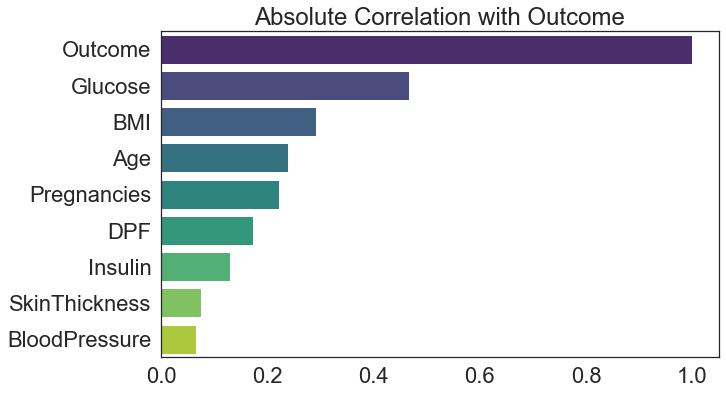

In [18]:
correlation_matrix = df.corr()

sorted_corr_abs = correlation_matrix["Outcome"].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr_abs.values, y=sorted_corr_abs.index, palette="viridis")
plt.title("Absolute Correlation with Outcome")
plt.show()


<span style="color:Green"> **Observation:**
* The correlation between Outcome and Glucose is high. Glucose seems to be the most important feature in model training.
* BMI, Pregnancies, and Age are also expected to be used as important features in model training.
* High correlation coefficient with SkinThickness and BMI. This might create a multicollinearity problem.

# Checking and treating Outliers

We plot our feautures without the target feauture (Outcome) to observe outliers

In [19]:
feature_names = [cname for cname in df.loc[:,:'Age'].columns]

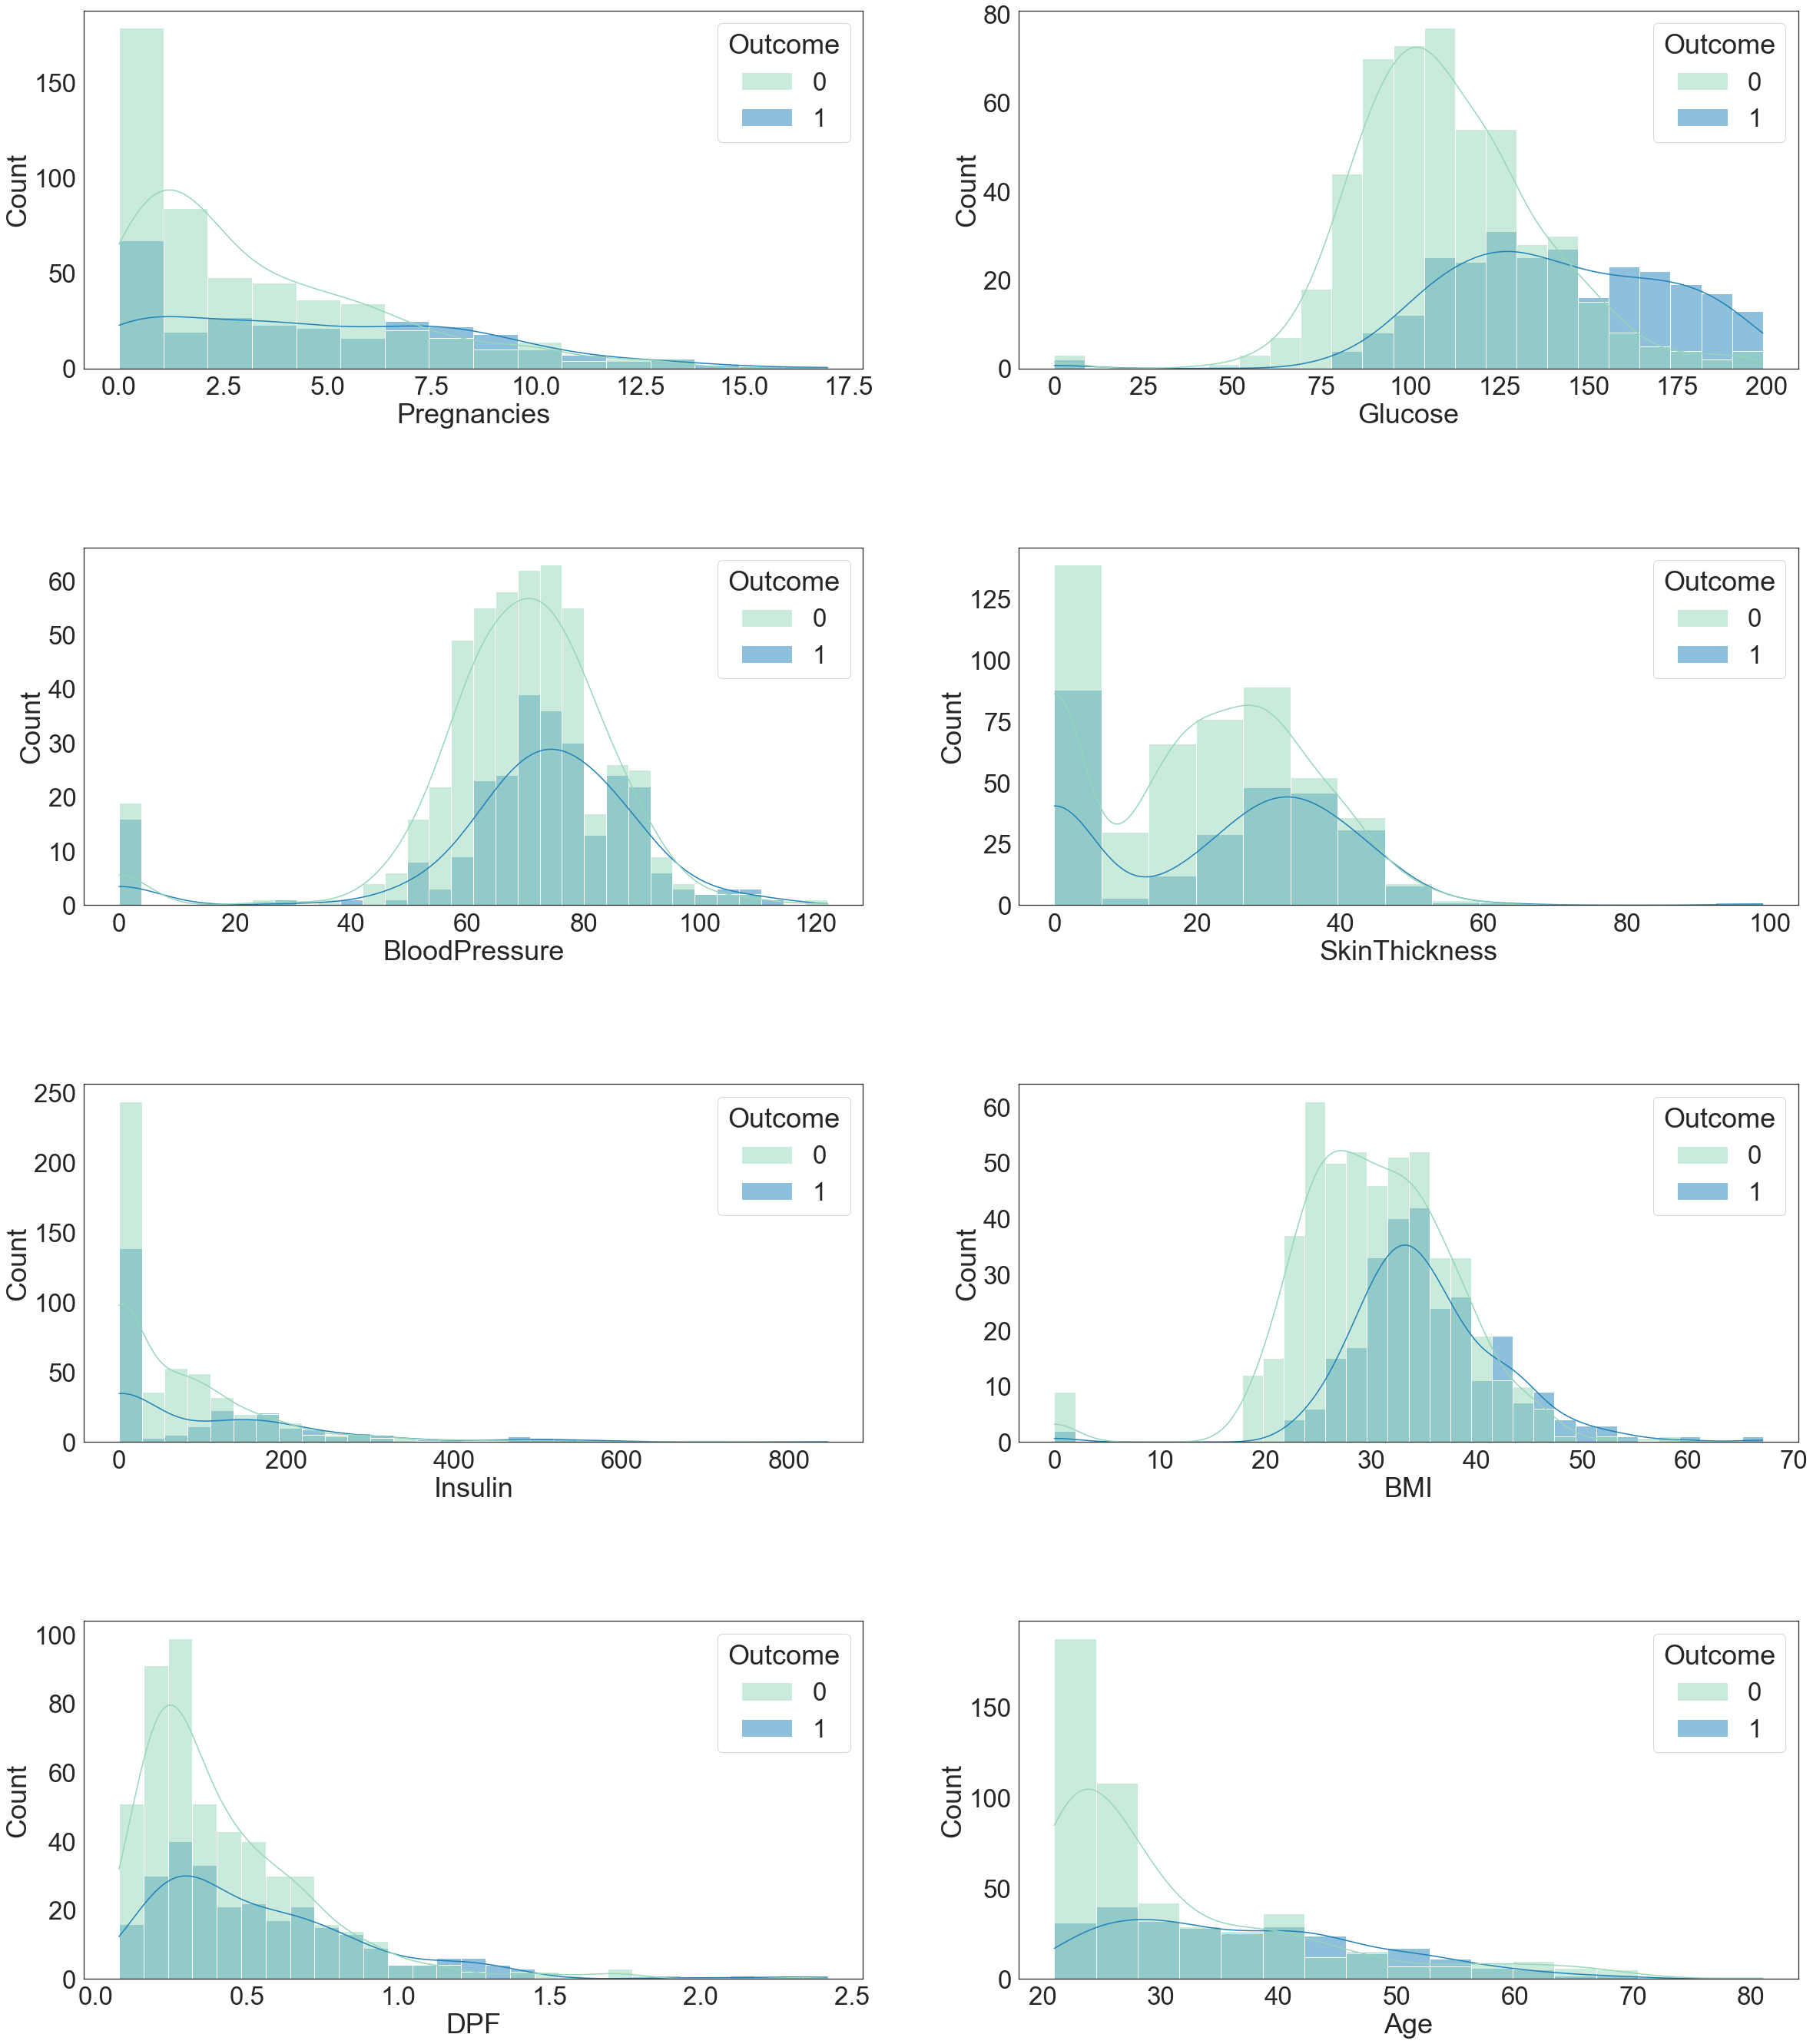

In [20]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

#### It seems that there are a lot of features that have 0 values and these should be treated as outliers. Age & DiabetesPedigreeFunction do not have to have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed.

Number of zero values in each column:

In [21]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


#### It seems that there are zero values in the above 5 features, and since they do not make sense in our analysis they need to be treated. It isn't medically possible for these data records to have 0 value (such as Blood Pressure, Glucose levels, BMI). Hence we replace them with the mean/median value of that particular column.
#### We will treat the 5 features: Insulin, Glucose, Skin Thickness, Blood Pressure, and BMI

In [22]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure',
                                                                      'SkinThickness','Insulin','BMI']].replace(0,np.NaN)

#### all zero values are encoded with NaN value

In [23]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [24]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

#### Insulin's medians by the target are really different, 102.5 for a healthy person and 169.5 for a diabetic person.
#### Therefore we need to replace the NaN values accordingly (and same for the next 4 features).

In [25]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

In [26]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [27]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

In [28]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [29]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [30]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [31]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [32]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [33]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

In [34]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

0
0
0
0
0


#### Now we do not have zero values.

# Adding New Features

In [35]:
df['BMIxThickness'] = df['BMI'] * df['SkinThickness']

df['Preg/Age'] =  df['Pregnancies'] / df['Age']

df['Age/Insulin'] = df['Age'] / df['Insulin']

df['BMIxAge'] = df['BMI'] * df['Age']

Text(0.5, 1.0, 'Correlation Plot')

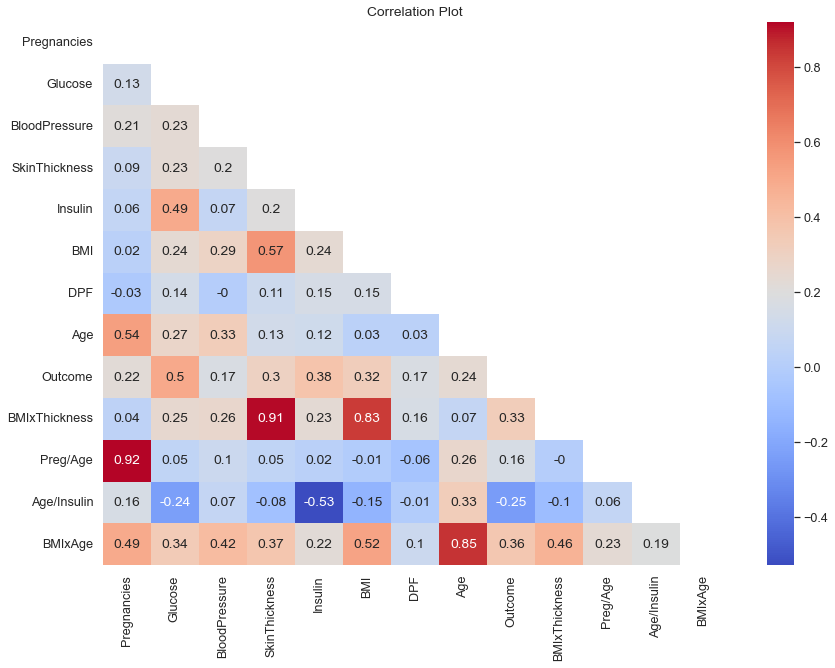

In [36]:
corr=df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=mask,cbar=True)
plt.title('Correlation Plot')

#### We inserted new features and they seem to have stronger correlations so they might be better used for prediction. 

#### We will sort the correlation to observe which features have the strongest relation to Outcome:

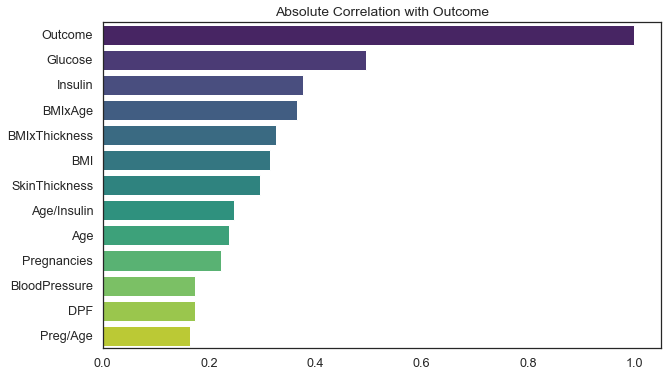

In [37]:
correlation_matrix = df.corr()

sorted_corr_abs = correlation_matrix["Outcome"].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr_abs.values, y=sorted_corr_abs.index, palette="viridis")
plt.title("Absolute Correlation with Outcome")
plt.show()


# Features Selection according to semantic importance / relevance

#### Extra Trees can be used to estimate the importance of features.

In [38]:
from sklearn.model_selection import train_test_split

df_clean_name = df.columns
X_c = df.drop('Outcome', axis=1)  # Use iloc to select columns by index
Y_c = df['Outcome']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, Y_c,
                                                            test_size=0.25,
                                                            random_state=0,
                                                            stratify=df['Outcome'])


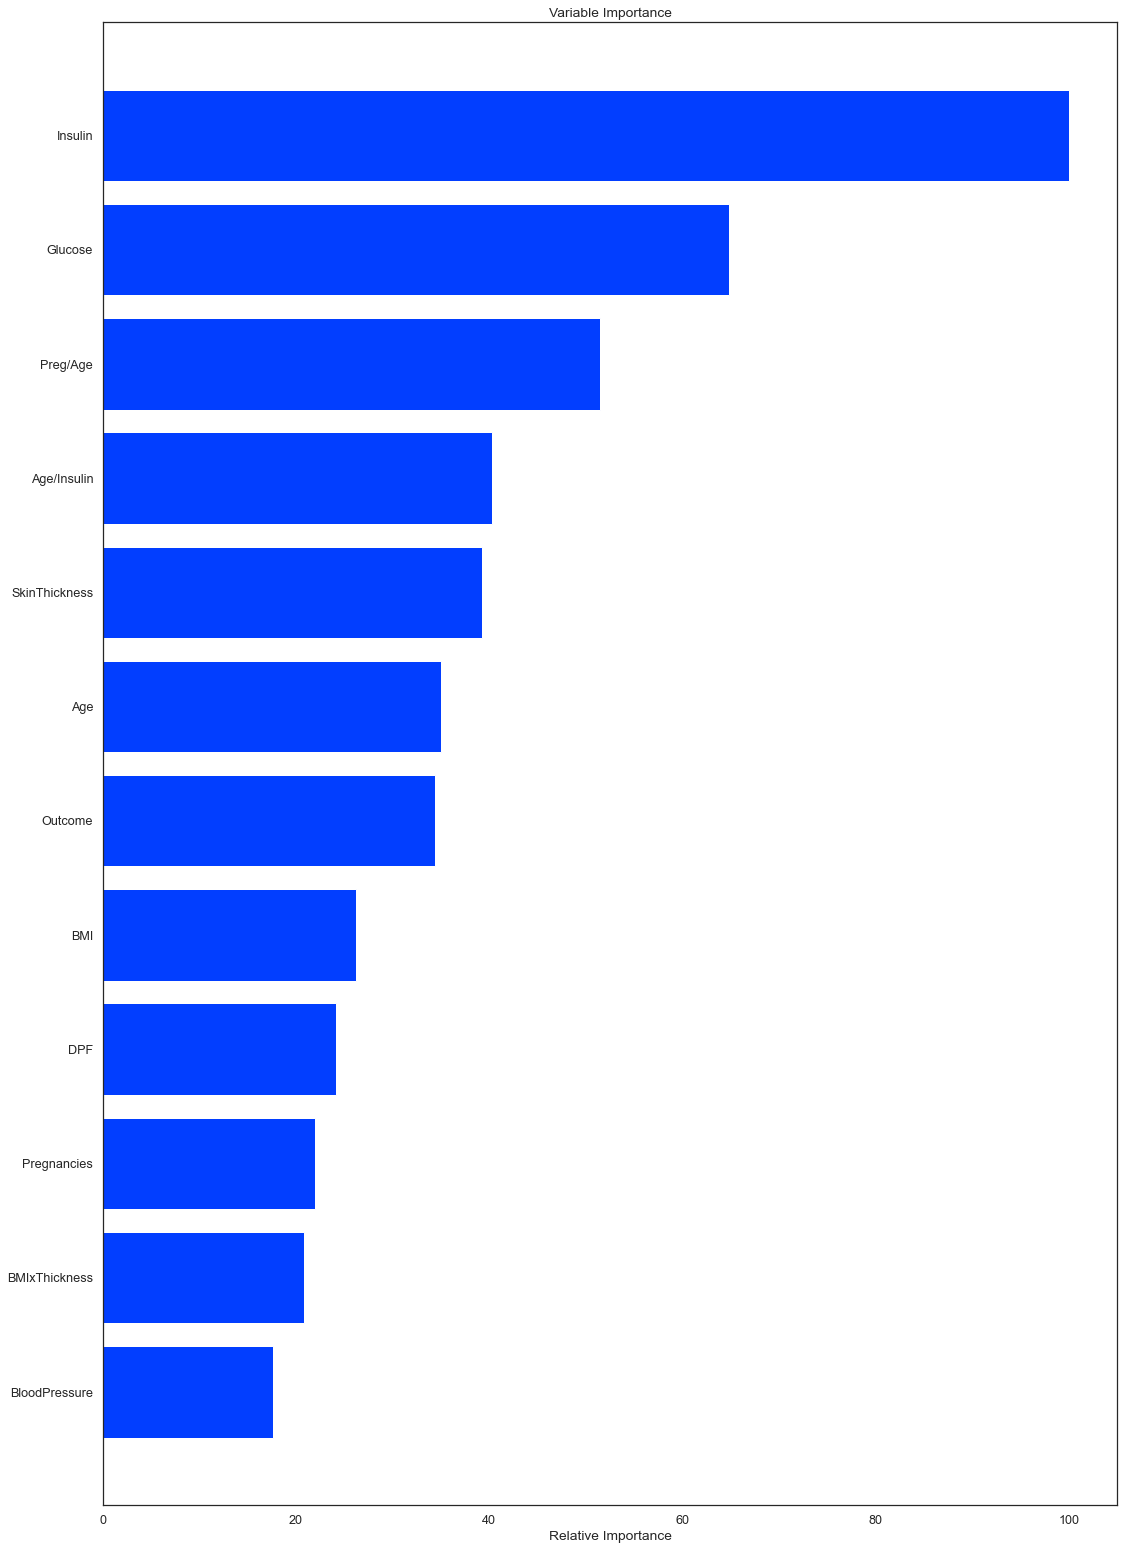

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=7)

clf.fit(X_train_c, y_train_c)

# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(2, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#### Best K Features can also be used to select the best features.

In [40]:
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=df['Outcome'])

# Use SelectKBest with chi2 for feature selection
k_features = 7  # Specify the number of features to select
X_train_selected = SelectKBest(chi2, k=k_features).fit_transform(X_train, y_train)
X_test_selected = SelectKBest(chi2, k=k_features).fit_transform(X_test, y_test)

print(f"Original shape of X_train: {X_train.shape}")
print(f"Shape of X_train after feature selection: {X_train_selected.shape}")
print(f"Original shape of X_test: {X_test.shape}")
print(f"Shape of X_test after feature selection: {X_test_selected.shape}")


Original shape of X_train: (576, 12)
Shape of X_train after feature selection: (576, 7)
Original shape of X_test: (192, 12)
Shape of X_test after feature selection: (192, 7)


In [41]:
selector = SelectKBest(chi2, k=k_features).fit(X_train, y_train)

selected_features_indices = selector.get_support(indices=True)


selected_features_names = X.columns[selected_features_indices]

print(f"Selected features: {selected_features_names}")

Selected features: Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'Age',
       'BMIxThickness', 'BMIxAge'],
      dtype='object')


#### Regularized Logistic Regression can also be used to select the best features

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=df['Outcome'])

# Standardizing the features before choosing the best ones 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)

logreg.fit(X_train_scaled, y_train)

model = SelectFromModel(logreg, prefit=True)


X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)

selected_features = X.columns[model.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DPF', 'Age',
       'Preg/Age', 'Age/Insulin', 'BMIxAge'],
      dtype='object')


#### Extra Trees, K Best Features, and Regularized Logistics Regression produced slightly different results, we will choose the common features between them

In [43]:
df_feature_imp=df[['Pregnancies','Glucose','SkinThickness','Insulin','Age','BMIxThickness','BMIxAge','Outcome']]

#### It seems that the features Pregnancies, Glucose, Insulin, SkinThickness, Age, BMIxThickness, and BMIxAge had the highest relative importance and therefore were selected to our final clean dataset

# Normalizing the data

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
SEED=7

def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines

In [67]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [68]:
from sklearn.model_selection import train_test_split

df_clean_name = df_feature_imp.columns
X = df_feature_imp.drop('Outcome', axis=1)  # Use iloc to select columns by index
Y = df_feature_imp['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                            test_size=0.25,
                                                            random_state=0,
                                                            stratify=df_feature_imp['Outcome'])


In [69]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [70]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [71]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [72]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0    minmaxLR  0.7814
1   minmaxLDA  0.7866
2   minmaxKNN  0.7794
3  minmaxCART  0.8490
4    minmaxNB  0.7658
5   minmaxSVM  0.8249
6    minmaxAB  0.8716
7   minmaxGBM  0.8839
8    minmaxRF  0.8907
9    minmaxET  0.8769

In [73]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreStandard = ScoreDataFrame(names,results)
scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.781397 (0.031097)
minmaxLDA: 0.786630 (0.030849)
minmaxKNN: 0.779431 (0.035329)
minmaxCART: 0.850817 (0.021389)
minmaxNB: 0.765759 (0.040377)
minmaxSVM: 0.824894 (0.038861)
minmaxAB: 0.871627 (0.032745)
minmaxGBM: 0.885602 (0.029546)
minmaxRF: 0.889020 (0.026566)
minmaxET: 0.869994 (0.030459)


Model   Score       Model   Score       Model   Score
0    minmaxLR  0.7814    minmaxLR  0.7814    minmaxLR  0.7814
1   minmaxLDA  0.7866   minmaxLDA  0.7866   minmaxLDA  0.7866
2   minmaxKNN  0.7794   minmaxKNN  0.7794   minmaxKNN  0.7794
3  minmaxCART  0.8490  minmaxCART  0.8508  minmaxCART  0.8508
4    minmaxNB  0.7658    minmaxNB  0.7658    minmaxNB  0.7658
5   minmaxSVM  0.8249   minmaxSVM  0.8249   minmaxSVM  0.8249
6    minmaxAB  0.8716    minmaxAB  0.8716    minmaxAB  0.8716
7   minmaxGBM  0.8839   minmaxGBM  0.8856   minmaxGBM  0.8856
8    minmaxRF  0.8907    minmaxRF  0.8890    minmaxRF  0.8890
9    minmaxET  0.8769    minmaxET  0.8700    minmaxET  0.8700

Scaled features

In [74]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
scaler = MinMaxScaler()

#### After dataset normalization, all classifiers proved a score above 0.7 which is relatively good.

In [76]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [77]:
X_train_scaled_df.reset_index(drop=True, inplace=True)
X_test_scaled_df.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#Putting the training and testing sets back together into one dataset to describe it
combined_features_df = pd.concat([X_train_scaled_df, X_test_scaled_df], axis=0)
combined_target = pd.concat([y_train, y_test], axis=0)
final_df = pd.concat([combined_features_df, combined_target], axis=1)

In [78]:
final_df.describe()

Pregnancies     Glucose  SkinThickness     Insulin         Age  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      0.226180    0.501142       0.240107    0.153550    0.204015   
std       0.198210    0.196543       0.096639    0.107092    0.196004   
min       0.000000    0.000000       0.000000    0.000000    0.000000   
25%       0.058824    0.359677       0.195652    0.106370    0.050000   
50%       0.176471    0.470968       0.228261    0.106370    0.133333   
75%       0.352941    0.620968       0.271739    0.186899    0.333333   
max       1.000000    1.000000       1.000000    1.000000    1.000000   

       BMIxThickness     BMIxAge     Outcome  
count     768.000000  768.000000  768.000000  
mean        0.233260    0.301627    0.348958  
std         0.125907    0.189209    0.476951  
min         0.000000    0.000000    0.000000  
25%         0.146290    0.156007    0.000000  
50%         0.218169    0.262290    0.000000  
75%         0.295569    0.421203    1.000000  
max         1.000000    1.000000    1.000000

In [79]:
final_df.shape

(768, 8)

#### Our final dataset contains 8 features including the target feature "Outcome". 
#### It does not have any missing values nor incorrect zero values.
#### Therefore we will continue our project with the final clean dataset after preprocessing and feature engineering.